# Predict a Student's performance

Importing the modules

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import seaborn as sns

## Loading data

In [276]:
DATA = pd.read_excel(r'C:\Users\rishi\Desktop\Programming\Python\Projects\Advanced Projects\StudentPerformanceML\student\student-mat.xlsx')

## Getting Familiar with the data

In [277]:
DATA.shape

(395, 33)

In [278]:
DATA.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Graphing the data

In [279]:
sns.set(style="darkgrid")

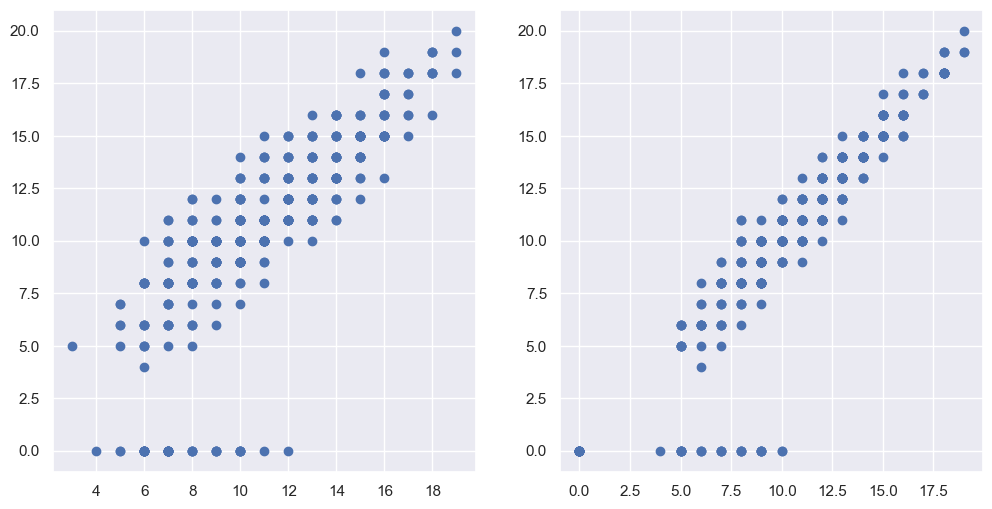

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax1 = ax[0]
ax1.scatter(DATA["G1"], DATA["G3"])

ax2 = ax[1]
ax2.scatter(DATA["G2"], DATA["G3"])

# Getting the dummy variables to do the job

In [281]:
variables = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences"]
DATA = pd.get_dummies(data=DATA, 
                      prefix=variables,
                      columns=variables)

In [282]:
DATA.head()

,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_17,absences_18,absences_19,absences_20,absences_21,absences_22,absences_23,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,5,6,6,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,6,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,8,10,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,14,15,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,10,10,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


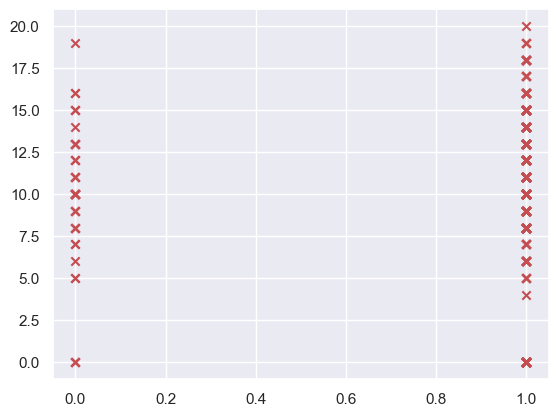

In [283]:
plt.scatter(DATA["school_GP"], DATA["G3"], c='r', marker='x')

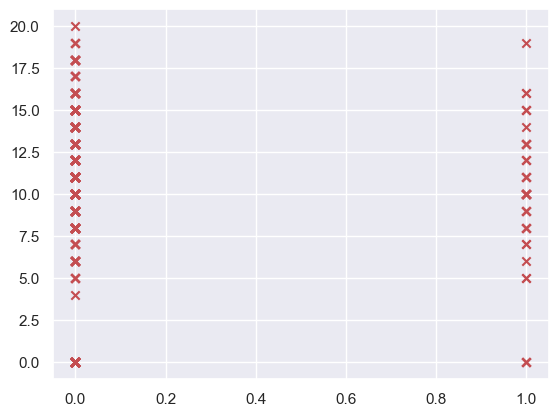

In [284]:
plt.scatter(DATA["school_MS"], DATA["G3"], c='r', marker='x')

Obviously the result for boolean entries will be mirror images of each other, thus removing unwanted features, to save computation

In [285]:
DATA.drop_duplicates()

,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_17,absences_18,absences_19,absences_20,absences_21,absences_22,absences_23,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,5,6,6,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,6,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,8,10,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,14,15,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,10,10,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,9,9,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391,14,16,16,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39

In [286]:
DATA = DATA.drop(columns=["school_MS", "sex_F", "address_U", "famsize_GT3", "Pstatus_A", "schoolsup_no", "famsup_no", "paid_no", "activities_no", "nursery_no", "higher_no", "internet_no", "romantic_no"])
print(f"The shape of the data now becomes: {DATA.shape}")
DATA.head()

The shape of the data now becomes: (395, 127)


,G1,G2,G3,school_GP,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,famsize_LE3,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_17,absences_18,absences_19,absences_20,absences_21,absences_22,absences_23,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,5,6,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,8,10,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,14,15,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,10,10,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we are all set to divide the data into the __training__ and __test__ and __validation__ sets <br>
Also because most of the data is in 0s and 1s, we need not worry about scale those features, however we shale scale G1, and G2

In [287]:
DATA["G1"] = (DATA["G1"]-DATA["G1"].mean())/DATA["G1"].std()
DATA["G2"] = (DATA["G2"]-DATA["G2"].mean())/DATA["G2"].std()

In [288]:
DATA.head()

,G1,G2,G3,school_GP,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,famsize_LE3,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_17,absences_18,absences_19,absences_20,absences_21,absences_22,absences_23,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,-1.780209,-1.253202,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.780209,-1.519053,6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.177653,-0.721500,10,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.232570,0.873607,15,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.478931,-0.189797,10,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Graphing the data with reference to G1 and G2

<AxesSubplot:title={'center':'G3 as a function of G1 and G2'}, xlabel='G1', ylabel='G2'>

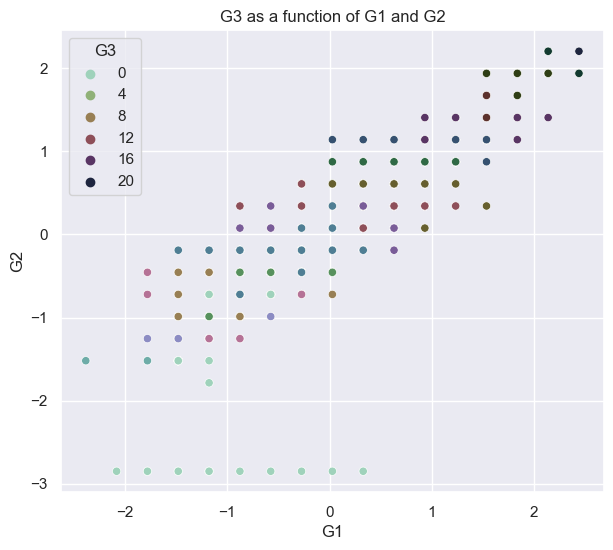

In [289]:
fig, ax = plt.subplots(1, 1, figsize = (7, 6))
ax.set_title('G3 as a function of G1 and G2')
sns.scatterplot(x=DATA["G1"], y=DATA["G2"], hue=DATA["G3"], palette="ch:r=-7,l=0.75", ax = ax)

## Train test split

In [290]:
y = DATA["G3"]
x = DATA.drop(columns="G3")

In [291]:
print(f"The shape of the input features is: {x.shape}\nThe shape of the target parameter is: {y.shape}")

The shape of the input features is: (395, 126)
The shape of the target parameter is: (395,)


In [292]:
x.head()

,G1,G2,school_GP,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,famsize_LE3,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_17,absences_18,absences_19,absences_20,absences_21,absences_22,absences_23,absences_24,absences_25,absences_26,absences_28,absences_30,absences_38,absences_40,absences_54,absences_56,absences_75
0,-1.780209,-1.253202,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.780209,-1.519053,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.177653,-0.721500,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.232570,0.873607,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.478931,-0.189797,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [294]:
x_train, x_, y_train, y_ = sklearn.model_selection.train_test_split(x, y, test_size=0.4, random_state=1)
x_cv, x_test, y_cv, y_test = sklearn.model_selection.train_test_split(x_, y_, test_size=0.5, random_state=1)
del x_, y_

In [295]:
print(f"The training set input feature has size: {x_train.shape}")
print(f"The training set output parameter has size: {y_train.shape}")
print(f"The cross validation input feature has size: {x_cv.shape}")
print(f"The cross validation output parameter has size: {y_cv.shape}")
print(f"The test set input feature has the shape: {x_test.shape}")
print(f"The test set output parameter has the shape: {y_test.shape}")

The training set input feature has size: (237, 126)
The training set output parameter has size: (237,)
The cross validation input feature has size: (79, 126)
The cross validation output parameter has size: (79,)
The test set input feature has the shape: (79, 126)
The test set output parameter has the shape: (79,)


## The Linear Regression Approach

First we find the predictions using linear regression, then we approximate to the nearest integer

In [336]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import mean_squared_error

First we build a prototype model

In [337]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Compute the  training set MSE

In [338]:
yhat_train = model.predict(x_train)
print(f"Training MSE: {mean_squared_error(y_train, yhat_train)/2}")
yhat_cv = model.predict(x_cv)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat_cv)/2}")
yhat_test = model.predict(x_test)
print(f"Testing MSE: {mean_squared_error(y_test, yhat_test)/2}")

Training MSE: 1.0401262286343151
Cross validation MSE: 5.504774966636457e+22
Testing MSE: 6.6642802954495045e+22


## Neural Networks Approach

In [299]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError

## Using Linear activation for the output layer

In [300]:
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

Testing the above structures, and then choosing the one that gives lowest error...

In [301]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models()

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    # Record the training MSEs
    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat_cv = model.predict(x_cv)
    cv_mse = mean_squared_error(y_cv, yhat_cv)/2
    nn_cv_mses.append(cv_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training model_1...


Done!

3/3 [==============================] - 0s 3ms/step
Training model_2...
Done!

3/3 [==============================] - 0s 3ms/step
Training model_3...
Done!

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.05, CV MSE: 2.49
Model 2: Training MSE: 0.95, CV MSE: 3.35
Model 3: Training MSE: 11.59, CV MSE: 8.91


## Diagnostics

We have very low training MSE, but we have high CV MSE in every problem, pointing towards high variance, thus we use kernel_regularizer to regularize the neural network

In [302]:
from tensorflow.keras.regularizers import L2
def build_models(lambda_):
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(15, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(20, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [303]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = build_models(0.01)

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    # Record the training MSEs
    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat_cv = model.predict(x_cv)
    cv_mse = mean_squared_error(y_cv, yhat_cv)/2
    nn_cv_mses.append(cv_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training model_1...
Done!

3/3 [==============================] - 0s 2ms/step
Training model_2...
Done!

3/3 [==============================] - 0s 3ms/step
Training model_3...
Done!

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.65, CV MSE: 1.84
Model 2: Training MSE: 0.74, CV MSE: 2.81
Model 3: Training MSE: 0.49, CV MSE: 1.58


Clearly the third model is doing the best, hence we select that model

In [304]:
def build_model(lambda_):
    model = Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
            Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
        ],
        name='model_3'
    )
    return model

Now for the right value of regularisation parameter

In [305]:
nn_train_mses = []
nn_cv_mses = []
lambdas = []

for i in range(1, 50, 2):
    lambda_ = 0.001*2*i
    lambdas.append(lambda_)
    model = build_model(lambda_)

    model.compile(
        loss = 'mse',
        optimizer = Adam(learning_rate=0.1),
    )
    print(f"Training for lambda = {lambda_}...")

    model.fit(
        x_train, y_train,
        epochs = 300,
        verbose = 0,
    )

    print("Done!\n")

    yhat_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, yhat_train)/2
    nn_train_mses.append(train_mse)

    yhat_cv = model.predict(x_cv)
    cv_mse = mean_squared_error(y_cv, yhat_cv)/2
    nn_cv_mses.append(cv_mse)

print("RESULT:")
idx = 0
for lambda_ in lambdas:
    print(
        f"Lambda = {lambda_}:\nTraining MSE: {nn_train_mses[idx]:.2f}, " +
        f"CV MSE: {nn_cv_mses[idx]:.2f}"
    )
    idx += 1

Training for lambda = 0.002...
Done!

3/3 [==============================] - 0s 2ms/step
Training for lambda = 0.006...
Done!

3/3 [==============================] - 0s 3ms/step
Training for lambda = 0.01...
Done!

3/3 [==============================] - 0s 2ms/step
Training for lambda = 0.014...
Done!

3/3 [==============================] - 0s 4ms/step
Training for lambda = 0.018000000000000002...
Done!

3/3 [==============================] - 0s 3ms/step
Training for lambda = 0.022...
Done!

3/3 [==============================] - 0s 4ms/step
Training for lambda = 0.026000000000000002...
Done!

3/3 [==============================] - 0s 3ms/step
Training for lambda = 0.03...
Done!

3/3 [==============================] - 0s 2ms/step
Training for lambda = 0.034...
Done!

3/3 [==============================] - 0s 2ms/step
Training for lambda = 0.038...
Done!

3/3 [==============================] - 0s 3ms/step
Training for lambda = 0.042...
Done!

3/3 [==============================] - 0s 6m

From the above value, we choose the value of regularisation paramter to be equal to 0.046

Thus our model becomes

In [309]:
lambda_ = 0.046
model = Sequential(
    [
        Dense(32, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(16, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(8, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(4, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(12, activation = 'relu', kernel_regularizer=L2(lambda_)),
        Dense(1, activation = 'linear', kernel_regularizer=L2(lambda_))
    ],
    name='model_fin'
)


In [313]:

model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)
model.fit(x_train, y_train,
          epochs = 300,
          verbose = 0)

In [316]:
yhat_train = model.predict(x_train)
print(f"The training set error is: {mean_squared_error(y_train, yhat_train)/2}")

yhat_cv  = model.predict(x_cv)
print(f"The cross validation set error is: {mean_squared_error(y_cv, yhat_cv)/2}")

yhat_test = model.predict(x_test)
print(f"The testing set error is: {mean_squared_error(y_test, yhat_test)/2}")

8/8 [==============================] - 0s 3ms/step
The training set error is: 0.9600326870347639
3/3 [==============================] - 0s 2ms/step
The cross validation set error is: 2.214368825793186
3/3 [==============================] - 0s 3ms/step
The testing set error is: 2.383321436707841


## Decision Tree Aproach

In [365]:
from xgboost import XGBRegressor

In [368]:
model = XGBRegressor(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 0)
model.fit(x_train, y_train, eval_set=[(x_cv, y_cv)], early_stopping_rounds=10)


[0]	validation_0-rmse:9.86453
[1]	validation_0-rmse:8.91955
[2]	validation_0-rmse:8.07827
[3]	validation_0-rmse:7.30712
[4]	validation_0-rmse:6.61212
[5]	validation_0-rmse:6.00187
[6]	validation_0-rmse:5.47346
[7]	validation_0-rmse:4.98286
[8]	validation_0-rmse:4.56703
[9]	validation_0-rmse:4.21241
[10]	validation_0-rmse:3.86576
[11]	validation_0-rmse:3.58063
[12]	validation_0-rmse:3.33913
[13]	validation_0-rmse:3.13454
[14]	validation_0-rmse:2.93982
[15]	validation_0-rmse:2.78023
[16]	validation_0-rmse:2.63983
[17]	validation_0-rmse:2.50519
[18]	validation_0-rmse:2.40807
[19]	validation_0-rmse:2.32289
[20]	validation_0-rmse:2.23792
[21]	validation_0-rmse:2.18194
[22]	validation_0-rmse:2.12635
[23]	validation_0-rmse:2.07342
[24]	validation_0-rmse:2.03690
[25]	validation_0-rmse:2.00069


c:\Users\rishi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.98232
[27]	validation_0-rmse:1.95493
[28]	validation_0-rmse:1.93258
[29]	validation_0-rmse:1.91394
[30]	validation_0-rmse:1.90070
[31]	validation_0-rmse:1.88249
[32]	validation_0-rmse:1.86989
[33]	validation_0-rmse:1.86077
[34]	validation_0-rmse:1.84257
[35]	validation_0-rmse:1.83434
[36]	validation_0-rmse:1.83089
[37]	validation_0-rmse:1.82087
[38]	validation_0-rmse:1.81876
[39]	validation_0-rmse:1.81224
[40]	validation_0-rmse:1.80601
[41]	validation_0-rmse:1.80677
[42]	validation_0-rmse:1.80534
[43]	validation_0-rmse:1.80154
[44]	validation_0-rmse:1.79781
[45]	validation_0-rmse:1.79730
[46]	validation_0-rmse:1.79253
[47]	validation_0-rmse:1.79289
[48]	validation_0-rmse:1.79568
[49]	validation_0-rmse:1.79808
[50]	validation_0-rmse:1.79831
[51]	validation_0-rmse:1.80015
[52]	validation_0-rmse:1.79919
[53]	validation_0-rmse:1.79823
[54]	validation_0-rmse:1.79807
[55]	validation_0-rmse:1.79928


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [369]:
model.best_iteration

46

In [371]:
yhat_train = model.predict(x_train)
print(f"The training set error is: {mean_squared_error(y_train, yhat_train)/2}")

yhat_cv  = model.predict(x_cv)
print(f"The cross validation set error is: {mean_squared_error(y_cv, yhat_cv)/2}")

yhat_test = model.predict(x_test)
print(f"The testing set error is: {mean_squared_error(y_test, yhat_test)/2}")

The training set error is: 0.052042423109823065
The cross validation set error is: 1.606587576081011
The testing set error is: 2.039600981464339
